<a href="https://colab.research.google.com/github/RIZKYANGKATA/MACHLEARN/blob/main/Modul_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
Nama : Rizky Angkata P. S.

No. Absen : 24

Kelas : TI-3A

PRAKTIKUM P11
***

*PRAKTIKUM 1*

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/ML/dataset.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/ML')

*Langkah 1 - Import Library*

In [7]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

*Langkah 2 - Pra Pengolahan Data*

*Langkah 2.1. Pra Pengolahan Data Training*

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


*Langkah 2.2. Pra Pengolahan Data Testing*

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


*Langkah 3 - Pembuatan Model CNN*

*Langkah 3.1. - Inisiasi Model CNN*


In [10]:
cnn = tf.keras.models.Sequential()

*Langkah 3.2. - Pembuatan Layer Konvolusi 1*

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

*Langkah 3.3 - Pembuatan Layer Pooling 1*

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

*Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2*

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

*Langkah 3.5 - Flattening*

In [14]:
cnn.add(tf.keras.layers.Flatten())

*Langkah 3.6 - Fully Connected Layer 1 (Input)*

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

*Langkah 3.7 - Fully Connected Layer 2 (Output)*

In [16]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

*Langkah 3.8 - Compile Model CNN*

In [17]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

*Langkah 4 - Fit CNN*

In [18]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 63s 203ms/step - loss: 0.6799 - accuracy: 0.5623 - val_loss: 0.6319 - val_accuracy: 0.6370
Epoch 2/25
250/250 [==============================] - 45s 181ms/step - loss: 0.6195 - accuracy: 0.6549 - val_loss: 0.5873 - val_accuracy: 0.7030
Epoch 3/25
250/250 [==============================] - 45s 182ms/step - loss: 0.5729 - accuracy: 0.6938 - val_loss: 0.5529 - val_accuracy: 0.7295
Epoch 4/25
250/250 [==============================] - 49s 197ms/step - loss: 0.5393 - accuracy: 0.7179 - val_loss: 0.5242 - val_accuracy: 0.7525
Epoch 5/25
250/250 [==============================] - 50s 200ms/step - loss: 0.5133 - accuracy: 0.7424 - val_loss: 0.5102 - val_accuracy: 0.7500
Epoch 6/25
250/250 [==============================] - 45s 181ms/step - loss: 0.4884 - accuracy: 0.7617 - val_loss: 0.5827 - val_accuracy: 0.7075
Epoch 7/25
250/250 [==============================] - 46s 186ms/step - loss: 0.4719 - accuracy: 0.7739 - val_loss: 0.5225 - val_ac

*Langkah 5 - Prediksi dengan 1 Citra*

In [22]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 169ms/step


*PRAKTIKUM 2*

*Langkah 1 - Load Library*

In [23]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

*Langkah 2 - Unduh Dataset CIFAR*

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


*Langkah 3 - Verifikasi Data*

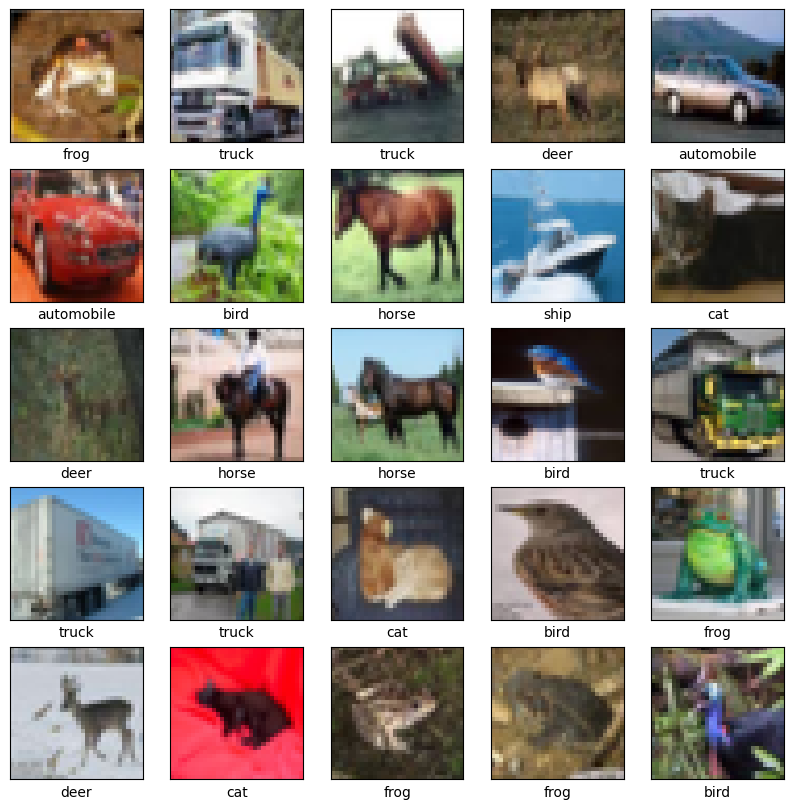

In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

*Langkah 4 - Buat Model CNN*

*Langkah 4.1. - Buat Layer Konvolusi*

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

*Langkah 4.2. - Cek Arsitektur Konvolusi*

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

*Langkah 4.3. - Tambahkan Layer Fully Connected*

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

*Langkah 4.4. - Cek Arsitektur Model CNN*

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

*Langkah 4.5. - Compile Model CNN*

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

*Langkah 5 - Fit Model*

In [31]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 9ms/step - loss: 1.5471 - accuracy: 0.4327 - val_loss: 1.2743 - val_accuracy: 0.5402
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2024 - accuracy: 0.5721 - val_loss: 1.1420 - val_accuracy: 0.5925
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0486 - accuracy: 0.6279 - val_loss: 1.0429 - val_accuracy: 0.6316
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9493 - accuracy: 0.6655 - val_loss: 0.9685 - val_accuracy: 0.6627
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8740 - accuracy: 0.6919 - val_loss: 0.9632 - val_accuracy: 0.6620
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8157 - accuracy: 0.7132 - val_loss: 0.9335 - val_accuracy: 0.6742
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7672 - accuracy: 0.7297 - val_loss: 0.9063 - val_ac

*Langkah 6 - Evaluasi Model*

313/313 - 1s - loss: 0.9076 - accuracy: 0.6978 - 727ms/epoch - 2ms/step


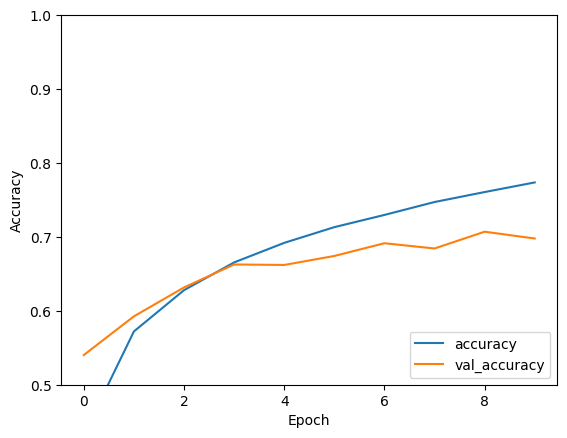

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

*Langkah 7 - Cetak Hasil Akurasi*

In [33]:
print(test_acc)

0.6977999806404114


**TUGAS**

*Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.*

*Langkah 1 : Import Library*


In [34]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

*Langkah 2: Memuat dataset CIFAR 1O*

In [35]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


*Langkah 3 : Normalisasi data dan konversi label ke vektor one-hot encoded*

In [36]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

*Langkah 4: Memisahkan data latih menjadi data latih dan data validasi*

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

*Langkah 5: Mendefinisikan model Convolutional Neural Network (CNN)*

In [38]:
def cnn_model():
    model = Sequential()
    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()
    return model

*Langkah 6: Membuat objek ImageDataGenerator dan mempersiapkan augmentasi data*

In [39]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(X_train)

*Langkah 7: Membuat model dan mengompilasi*

In [40]:
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)        

*Langkah 8: Melatih model dengan ImageDataGenerator*

In [41]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 57s 80ms/step - loss: 2.1568 - accuracy: 0.1967 - val_loss: 1.7800 - val_accuracy: 0.3556
Epoch 2/50
625/625 [==============================] - 44s 70ms/step - loss: 1.7190 - accuracy: 0.3574 - val_loss: 1.5232 - val_accuracy: 0.4398
Epoch 3/50
625/625 [==============================] - 42s 67ms/step - loss: 1.5292 - accuracy: 0.4450 - val_loss: 1.2757 - val_accuracy: 0.5391
Epoch 4/50
625/625 [==============================] - 45s 71ms/step - loss: 1.4056 - accuracy: 0.5113 - val_loss: 1.2359 - val_accuracy: 0.5647
Epoch 5/50
625/625 [==============================] - 44s 70ms/step - loss: 1.3013 - accuracy: 0.5573 - val_loss: 1.1315 - val_accuracy: 0.6018
Epoch 6/50
625/625 [==============================] - 44s 71ms/step - loss: 1.2294 - accuracy: 0.5889 - val_loss: 1.1009 - val_accuracy: 0.6255
Epoch 7/50
625/625 [==============================] - 44s 70ms/step - loss: 1.1641 - accuracy: 0.6116 - val_loss: 1.0039 - val_accuracy:

*Langkah 9: Mengevaluasi model pada set tes*

In [42]:
scores = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6672 - accuracy: 0.8395


*Langkah 10: Melakukan prediksi*

<Axes: >

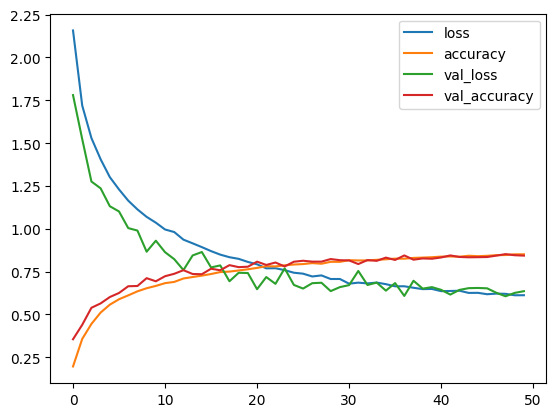

In [43]:
pd.DataFrame(history.history).plot()

*Langkah 11: Tampilkan laporan klasifikasi*

In [44]:
scores = model.evaluate(X_test, y_test)
pred = model.predict(X_test)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
errors = y_pred - y_true != 0
print(classification_report(y_true, y_pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.86      0.96      0.90      1000
           2       0.84      0.76      0.80      1000
           3       0.76      0.63      0.69      1000
           4       0.85      0.80      0.83      1000
           5       0.84      0.73      0.78      1000
           6       0.87      0.91      0.89      1000
           7       0.79      0.94      0.86      1000
           8       0.93      0.88      0.90      1000
           9       0.84      0.90      0.87      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



*Langkah 12: Menampilkan visualisasi hasil prediksi*

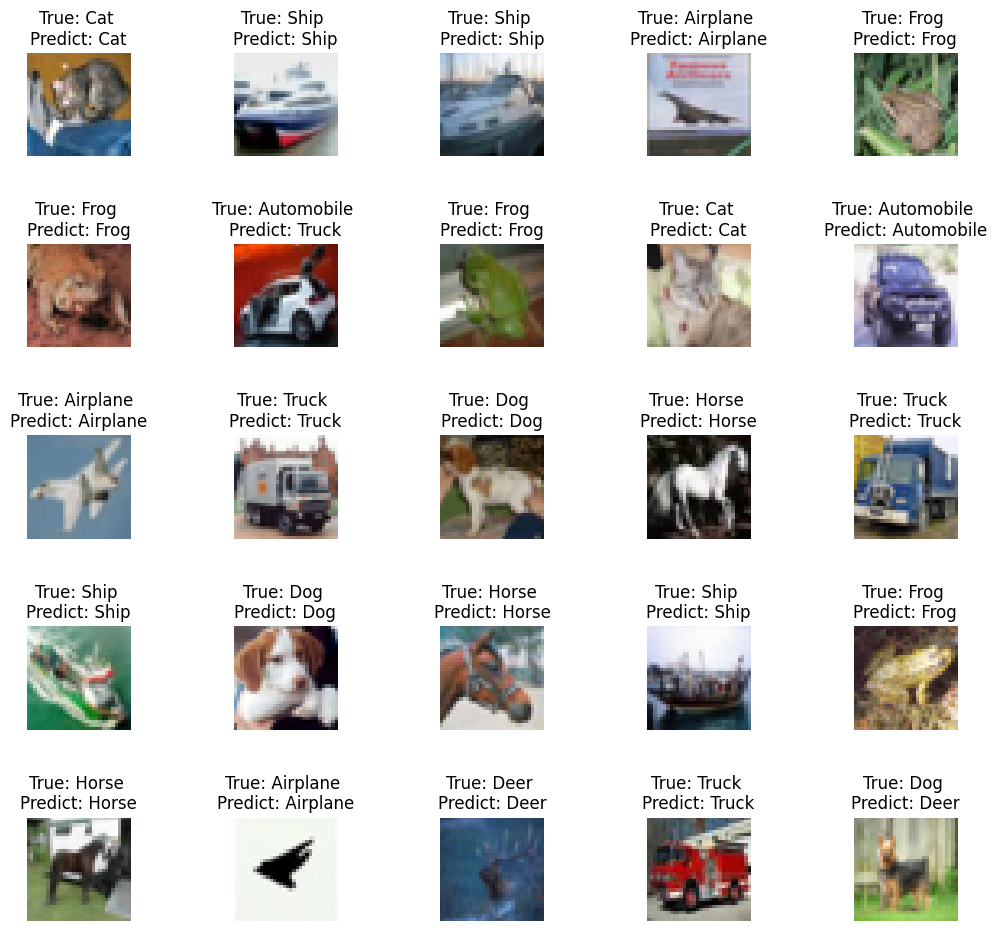

In [45]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Buatlah model CNN untuk klasifikasi dataset MNIST**

*Langkah 1: Memuat Dataset MNIST*


In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


*Langkah 2: Normalisasi Gambar ke Rentang [0, 1]*

In [47]:
# Normalisasi gambar ke rentang [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

*Langkah 3: Mengonversi Label ke Format One-Hot Encoding*

In [48]:
# Perbaikan: Mengimpor to_categorical dari tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# Mengonversi label ke format one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

*Langkah 4: Menampilkan Informasi tentang Dataset*

In [49]:
# Menampilkan informasi tentang dataset
print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


*Langkah 5: Membangun Model*

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

*Langkah 6: Mengompilasi Model*

In [51]:
# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

*Langkah 7: Menampilkan Ringkasan Model*

In [52]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

*Langkah 8: Melatih Model*

In [53]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 5s - loss: 0.3670 - accuracy: 0.8871 - val_loss: 0.0888 - val_accuracy: 0.9735 - 5s/epoch - 15ms/step
Epoch 2/10
329/329 - 2s - loss: 0.0982 - accuracy: 0.9712 - val_loss: 0.0597 - val_accuracy: 0.9824 - 2s/epoch - 7ms/step
Epoch 3/10
329/329 - 3s - loss: 0.0700 - accuracy: 0.9793 - val_loss: 0.0532 - val_accuracy: 0.9841 - 3s/epoch - 8ms/step
Epoch 4/10
329/329 - 2s - loss: 0.0544 - accuracy: 0.9839 - val_loss: 0.0455 - val_accuracy: 0.9860 - 2s/epoch - 7ms/step
Epoch 5/10
329/329 - 2s - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0401 - val_accuracy: 0.9883 - 2s/epoch - 5ms/step
Epoch 6/10
329/329 - 2s - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0500 - val_accuracy: 0.9870 - 2s/epoch - 6ms/step
Epoch 7/10
329/329 - 2s - loss: 0.0322 - accuracy: 0.9905 - val_loss: 0.0417 - val_accuracy: 0.9882 - 2s/epoch - 6ms/step
Epoch 8/10
329/329 - 2s - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0451 - val_accuracy: 0.9876 - 2s/epoch - 7ms/step
Epoch 9/10
329/329 - 2s

*Langkah 9: Plot Sejarah Pelatihan*

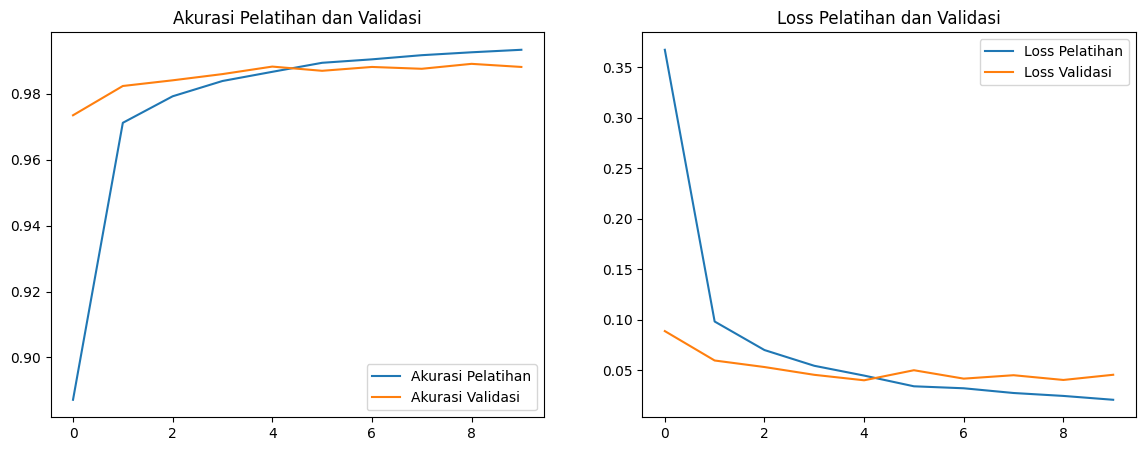

In [54]:
import matplotlib.pyplot as plt

# Plot sejarah pelatihan
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()

*Langkah 10: Evaluasi Model pada Kumpulan Data Uji*

In [55]:
# Evaluasi model pada kumpulan data uji
validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.03270266577601433
Akurasi Validasi: 0.9897000193595886


*Langkah 11: Menghasilkan Nilai Prediksi pada Kumpulan Data Uji*

In [56]:
# Menghasilkan nilai prediksi pada kumpulan data uji
y_pred_enc = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


*Langkah 12: Mendekode Nilai Prediksi*

In [57]:
# Mendekode nilai prediksi
y_pred = [np.argmax(i) for i in y_pred_enc]

*Langkah 13: Menampilkan Laporan Klasifikasi*

In [58]:
# Menampilkan laporan klasifikasi
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



*Langkah 14: Membuat Matriks Konfusi dan Menampilkannya dengan Heatmap*

Text(58.222222222222214, 0.5, 'Aktual')

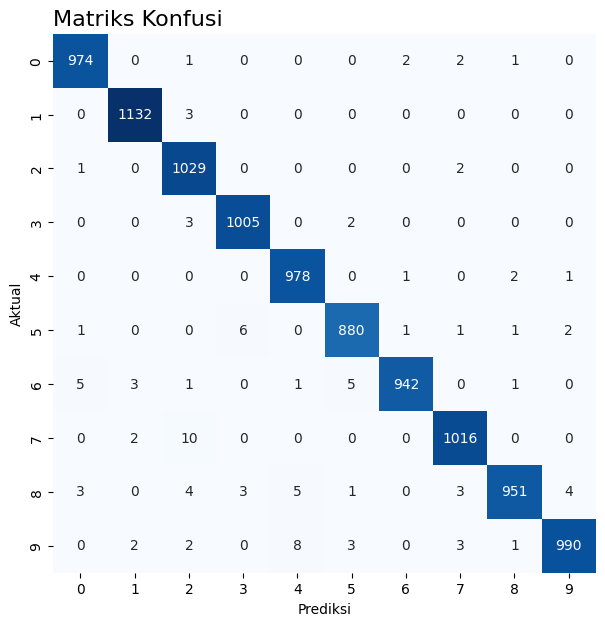

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat matriks konfusi dan menampilkannya dengan heatmap
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')

*Langkah 15: Menampilkan Target yang Diprediksi pada Setiap Gambar (Label di atas gambar adalah label yang diprediksi)*

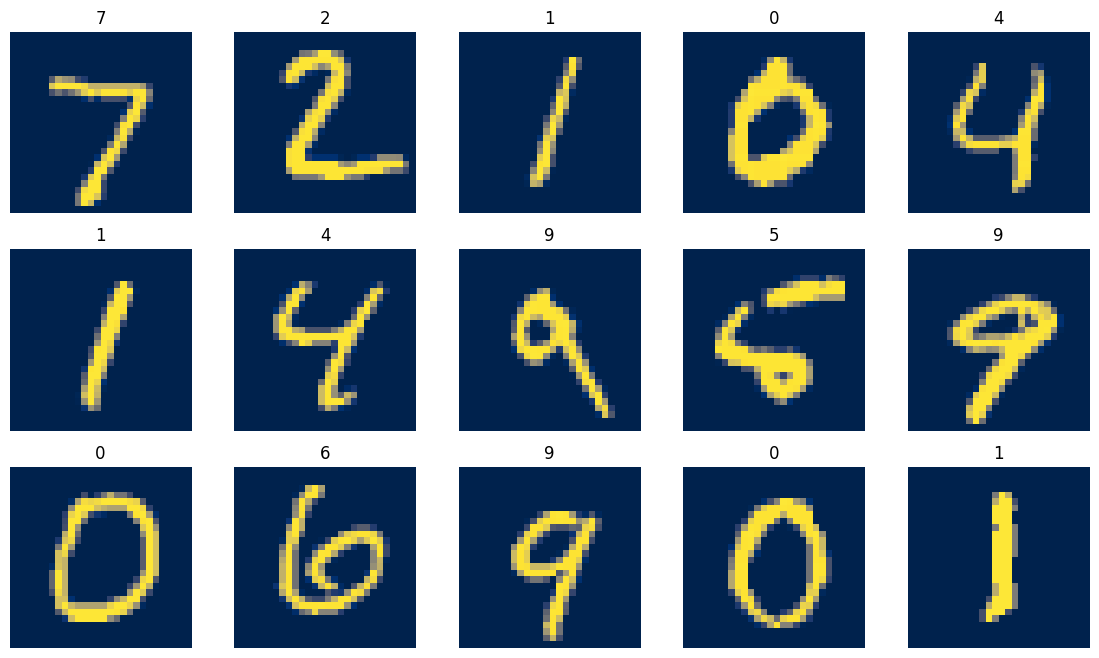

In [60]:
# Menampilkan target yang diprediksi pada setiap gambar
# (label di atas gambar adalah label yang diprediksi)
plt.figure(figsize=(14, 8))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')